In [7]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

In [8]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
print(len(dow), len(kospi))

5444 5336


In [12]:
dow.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,11501.849609,11522.009766,11305.690430,11357.509766,11357.509766,169750000
2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000
2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000
2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000
2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000


In [17]:
df = pd.DataFrame({'X': dow['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [19]:
reg = stats.linregress(df.X, df.Y)
reg_line = f'Y={reg.slope:.2f} * Y + {reg.intercept:.2f}'

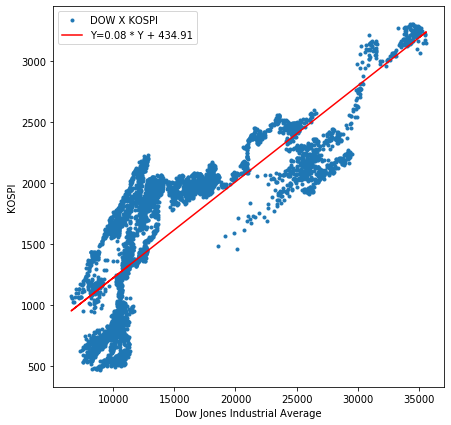

In [24]:
plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, reg.slope * df.X + reg.intercept, 'r')
plt.legend(['DOW X KOSPI', reg_line])
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()